Suppose we could convert the beam in Problem 2 to a fixed-free axial bar with initial axial displacement condition $u_0(x)=u(x, t=0)=\frac{F_0 x}{E A}$ caused by an suddenly axial tensile force $F_0$ (applied and removed immediately). Consider $F_0=1 \mathrm{~N}$, and please determine the vibration solution of the mechanical system:

$$u(x, t)=\sum_{n=0}^{\infty} C_n \sin \frac{(2 n+1) \pi x}{2 L} \cos \frac{(2 n+1) \pi c t}{2 L}$$
where $C_n=\frac{2}{L} \int_0^L u_0(x) \sin \frac{(2 n+1) \pi x}{2 L} d x$, and $c=\sqrt{E / \rho}$. 

Is your solution solved by FEM close to the exact solutions? Please provide your comments.

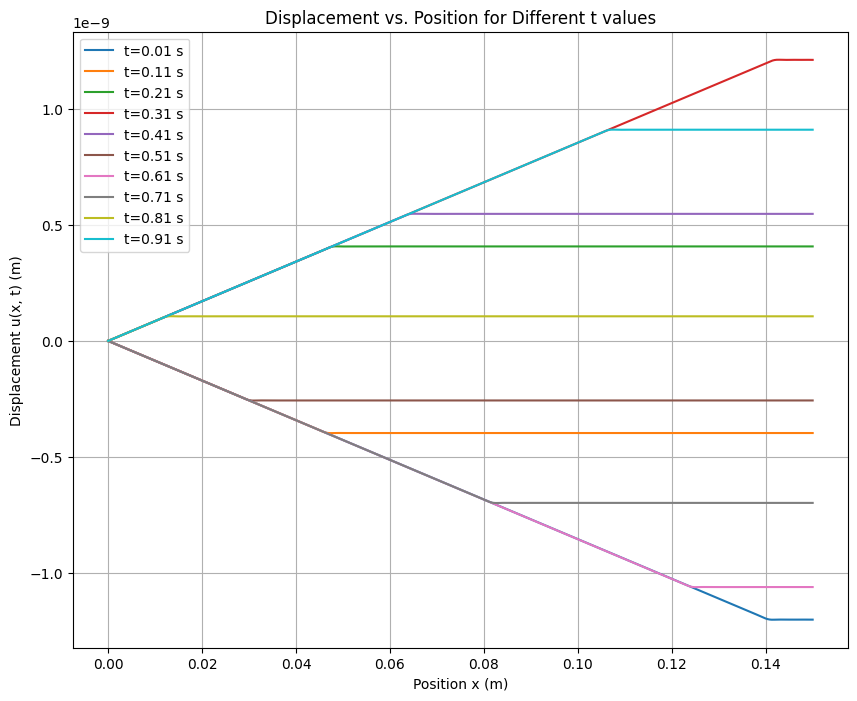

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
F0 = 1  # N
E_copper = 130e9  # Young's modulus in Pa
rho_copper = 8.96e3  # Density in kg/m^3
L = 0.15  # Length in meters
A = 0.03 * 0.03  # Cross-sectional area
c = np.sqrt(E_copper / rho_copper)  # Wave speed

# Define the initial displacement function u_0(x)
def u_0(x):
    return (F0 * x) / (E_copper * A)

# Calculate Cn coefficients
def calculate_Cn(n):
    integrand = lambda x: u_0(x) * np.sin((2 * n + 1) * np.pi * x / (2 * L))
    integral = np.round(np.trapz(integrand(np.linspace(0, L, 1000)), dx=L / 1000), decimals=16)
    return 2 * integral / L 


# Calculate displacement u(x, t)
def calculate_displacement(x, t, num_terms):
    displacement = 0.0
    for n in range(num_terms):
        Cn = calculate_Cn(n)
        term = Cn * np.sin((2 * n + 1) * np.pi * x / (2 * L)) * np.cos((2 * n + 1) * np.pi * c * t / (2 * L))
        displacement += term
    return displacement

# Generate x values
x_values = np.linspace(0, L, 1000)  # Generating x values from 0 to L

# Specific times for displacement calculation
t_values = np.arange(0.01, 1.01, 0.1)  # Generating t values from 0 to 1.1 seconds with step 0.2 seconds

# Plotting for each t_value
plt.figure(figsize=(10, 8))
for t_value in t_values:
    displacements = [calculate_displacement(x, t_value, 100) for x in x_values]
    plt.plot(x_values, displacements, label=f"t={t_value:.2f} s")

plt.title("Displacement vs. Position for Different t values")
plt.xlabel("Position x (m)")
plt.ylabel("Displacement u(x, t) (m)")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
calculate_Cn(1)

1.0381526493629286e-09

In [16]:
displacements = [calculate_displacement(x, 0.21, 100) for x in x_values]

In [17]:
max(displacements)

4.074078341144808e-10